# Assocation rule Algorithm
1. Apriori Algorithm

In [1]:
#importing Basic Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df=pd.read_csv("Groceries_dataset.csv")
#to see first 5 data
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
#to retrive those records whoes member number is 1808
df[df["Member_number"]==1808]

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
4355,1808,04-02-2015,long life bakery product
9090,1808,29-11-2014,meat
11488,1808,15-12-2014,sugar
16149,1808,21-07-2015,rolls/buns
20504,1808,04-02-2015,semi-finished bread
25239,1808,29-11-2014,whole milk
27637,1808,15-12-2014,citrus fruit
36088,1808,21-07-2015,candy
38731,1808,15-12-2014,napkins


In [4]:
#to see totLA record
df.shape

(38765, 3)

In [5]:
#to see max number of selling product
df["itemDescription"].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [6]:
df["itemDescription"].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [7]:
#sorting to see most purchased 10 record
X=df["itemDescription"].value_counts().sort_values(ascending=False)[:10] #slicing at the end
print(X)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64


In [8]:
I=X.index
print(I)

Index(['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt',
       'root vegetables', 'tropical fruit', 'bottled water', 'sausage',
       'citrus fruit'],
      dtype='object')


In [9]:
V=X.values
V

array([2502, 1898, 1716, 1514, 1334, 1071, 1032,  933,  924,  812],
      dtype=int64)

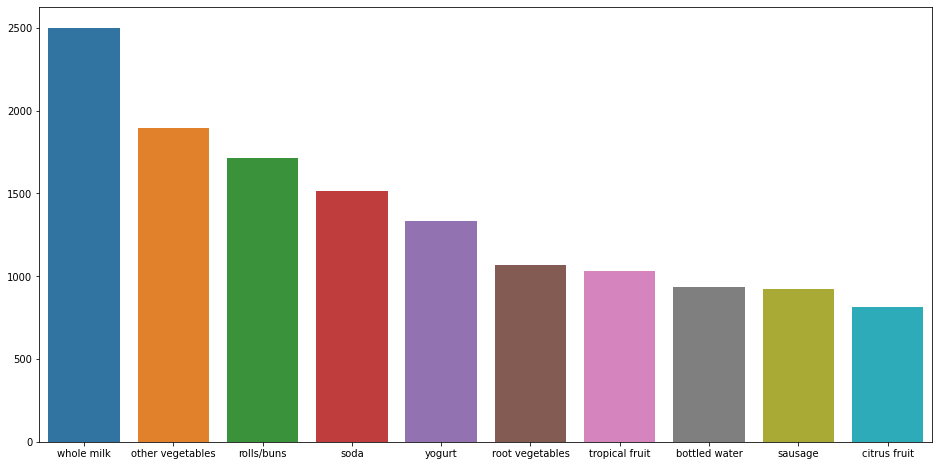

In [10]:
#visualization
#to increase sixe
plt.figure(figsize=(16,8))
sns.barplot(I,V)
plt.show()

In [11]:
#adding a new column "quantity" fill all the value as 1 in existing datase
df["Quantity"]=1
df.head()

,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1


In [12]:
#making group
df.groupby("Member_number")["Quantity"].count()

Member_number
1000    13
1001    12
1002     8
1003     8
1004    21
        ..
4996    10
4997     6
4998     2
4999    16
5000     7
Name: Quantity, Length: 3898, dtype: int64

In [13]:
#to see date intervals
df["Date"].unique()

array(['21-07-2015', '05-01-2015', '19-09-2015', '12-12-2015',
       '01-02-2015', '14-02-2015', '08-05-2015', '23-12-2015',
       '20-03-2015', '12-02-2015', '24-02-2015', '14-04-2015',
       '03-09-2015', '30-03-2015', '03-05-2015', '02-09-2015',
       '03-08-2015', '07-07-2015', '08-09-2015', '12-11-2015',
       '18-09-2015', '30-11-2015', '17-07-2015', '12-06-2015',
       '13-02-2015', '14-01-2015', '08-03-2015', '27-01-2015',
       '22-10-2015', '26-10-2015', '08-10-2015', '03-10-2015',
       '11-04-2015', '21-02-2015', '29-09-2015', '09-01-2015',
       '03-04-2015', '20-04-2015', '04-08-2015', '19-07-2015',
       '06-10-2015', '16-10-2015', '06-06-2015', '26-09-2015',
       '15-08-2015', '21-05-2015', '25-08-2015', '11-03-2015',
       '05-06-2015', '28-07-2015', '05-09-2015', '19-06-2015',
       '11-10-2015', '16-06-2015', '20-01-2015', '15-02-2015',
       '13-04-2015', '07-02-2015', '02-03-2015', '14-03-2015',
       '22-12-2015', '01-07-2015', '03-11-2015', '12-04

In [14]:
#to see how many members in dataset
df["Member_number"].unique().shape

(3898,)

In [15]:
#grouping member number with respect to item description and summing the quantity
s=df.groupby(["Member_number","itemDescription"])["Quantity"].sum()
print(s)

Member_number  itemDescription    
1000           canned beer            1
               hygiene articles       1
               misc. beverages        1
               pastry                 1
               pickled vegetables     1
                                     ..
5000           onions                 1
               other vegetables       1
               root vegetables        1
               semi-finished bread    1
               soda                   1
Name: Quantity, Length: 34766, dtype: int64


In [16]:
#creating a Pivote Table
transaction=df.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index("Member_number")
transaction.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [17]:
#to fill null value with 0
#transaction=transaction.fillna(0)
transaction.fillna(0,inplace=True)
transaction.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [18]:
#replace value with 1 if frequency is greater then 0
#creating a function
def encode(x):
    #one by one
    if x<=0:
        return 0
    elif x>0:
        return 1

In [19]:
#applying map function
basket=transaction.applymap(encode)
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#start proces for apriori rule ,required library mlxtnd (inbuilt library)
#!pip install mlxtend

You should consider upgrading via the 'C:\Users\Admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Apriori Algorithm

In [23]:
from mlxtend.frequent_patterns import apriori

In [24]:
#creating Objet of apriori
frequent_itemset=apriori(basket,min_support=0.06,use_colnames=True)

In [25]:
frequent_itemset

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
111,0.082093,"(rolls/buns, other vegetables, whole milk)"
112,0.069266,"(soda, other vegetables, whole milk)"
113,0.071832,"(yogurt, other vegetables, whole milk)"
114,0.065162,"(rolls/buns, soda, whole milk)"


# Aplying association rule


In [26]:
from mlxtend.frequent_patterns import association_rules

In [28]:
#creating objet of association rules
rules=association_rules(frequent_itemset,metric="lift",min_threshold=1)

In [29]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919
1,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257
3,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,0.008692,1.028212
4,(rolls/buns),(bottled beer),0.349666,0.158799,0.063109,0.180484,1.136555,0.007582,1.026461
5,(bottled beer),(rolls/buns),0.158799,0.349666,0.063109,0.397415,1.136555,0.007582,1.079240
6,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
7,(whole milk),(bottled beer),0.458184,0.158799,0.085428,0.186450,1.174124,0.012669,1.033988
8,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969
9,(other vegetables),(bottled water),0.376603,0.213699,0.093894,0.249319,1.166680,0.013414,1.047450


In [32]:
#filter
rules[(rules["confidence"]>0.5)&(rules["lift"]>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919
6,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
14,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
18,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,0.007481,1.113034
20,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,0.008239,1.136661
26,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795
36,(curd),(whole milk),0.120831,0.458184,0.063622,0.526539,1.149188,0.008259,1.144374
39,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766
46,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775
66,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
